## accuracy assessment

In [65]:
import os
import rasterio as rio
from rasterio.plot import show
import rioxarray as rxr
import geopandas as gpd
import pandas as pd

In [3]:
os.chdir('/Users/najah/work/internships/meghna//LT05_L1TP_145044_20100428_20161016_01_T1')

epsg:32643


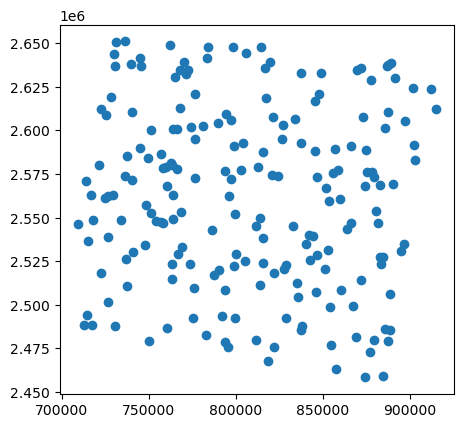

In [83]:
points = gpd.read_file('./145044_20100428_roi/145044_20100428_200points.random_points2/145044_20100428_200points.shp')
points.plot()
print(points.crs)

In [41]:
mle = rio.open('./145044_20100428_models/MLM_2/mlm_thresh_.3')

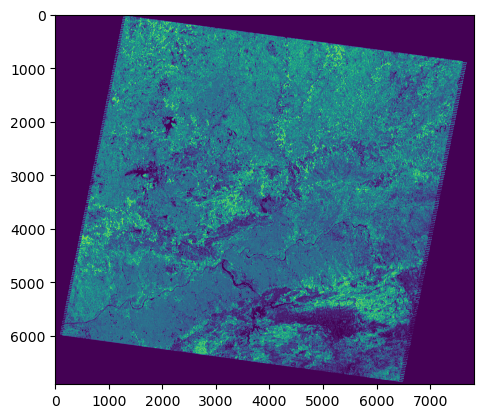

<AxesSubplot:>

In [42]:
show(mle.read(1))

In [44]:
print(mle.crs)

EPSG:32643


In [43]:
mle.descriptions

(None,)

<AxesSubplot:>

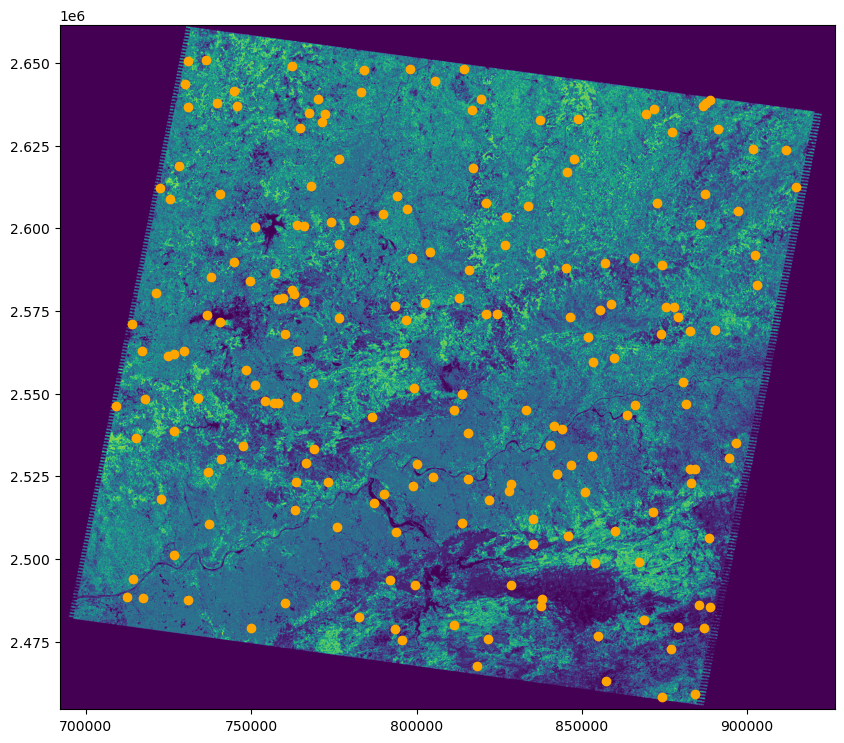

In [131]:
fig, ax = plt.subplots(figsize=(10,10))
points.plot(ax=ax, color = 'orange')
show(mle, ax=ax)

In [62]:
# printing x&y coordinate from the shapefile

class1= []

for point in points['geometry']:
    x = point.xy[0][0]
    y = point.xy[1][0]
    row, col = mle.index(x,y)
    #print(mle.read(1)[row, col])
    class1.append(mle.read(1)[row, col])

In [142]:
pd.Series(class1).value_counts()

0     57
7     30
2     28
4     18
3     16
1     16
8     15
9      9
6      9
10     2
dtype: int64

In [152]:
df = pd.concat([points['class'],pd.DataFrame(class1)], axis =1).rename(columns = {0:'classified'})

In [149]:
df.to_csv('./145044_20100428_models/MLM_2/cf_python.csv')

In [150]:
df

,class,classified
0,13,11
1,5,5
2,4,4
3,5,11
4,1,4
...,...,...
195,4,4
196,11,11
197,13,2
198,11,0


In [147]:
df['class']+df['classified']

0      24
1      10
2       8
3      16
4       5
       ..
195     8
196    22
197    15
198    11
199     7
Length: 200, dtype: int64

In [120]:
classified = pd.Series(class1)

1,2,4,5,8,11,13,15,16,17

In [123]:
points['class'].value_counts()

11    73
5     44
1     17
4     16
13    13
2     13
15    10
16     6
17     5
8      3
Name: class, dtype: int64

In [153]:
df['classified'].value_counts()

0     57
7     30
2     28
4     18
3     16
1     16
8     15
9      9
6      9
10     2
Name: classified, dtype: int64

In [154]:
replace_vals = {1:1,2:2,3:4,4:5,6:11,7:13,8:15,9:16,10:17}
df = df.replace({'classified':replace_vals})

In [160]:
cf =pd.crosstab(df['classified'], df['class'], margins = True, colnames = ['Ground Truth'])
cf

Ground Truth,1,2,4,5,8,11,13,15,16,17,All
classified,,,,,,,,,,,
0,3,6,4,6,2,30,4,1,1,0,57
1,11,0,0,0,0,2,0,3,0,0,16
2,0,4,0,17,0,5,2,0,0,0,28
4,1,0,11,0,0,3,0,0,0,1,16
5,1,1,1,14,0,1,0,0,0,0,18
11,0,0,0,0,0,7,0,2,0,0,9
13,0,1,0,7,0,10,7,0,1,4,30
15,1,0,0,0,0,7,0,4,3,0,15
16,0,0,0,0,1,7,0,0,1,0,9


In [163]:
7/13

0.5384615384615384

In [156]:
import numpy as np
np.diag(cf).sum() / cf.to_numpy().sum()

0.11